### Computing the Spatial and Temporal signature (SVD) for East, North and Vertical GPS components

In [657]:
# Importing the required packages

import geopandas
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from netCDF4 import date2index
from datetime import datetime
from netCDF4 import Dataset
from shapely.geometry import Point, Polygon, mapping
import cartopy.crs as ccrs
import scipy.optimize
from dateutil.relativedelta import relativedelta
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [658]:
data1 = pd.read_csv('./gps/OLO1.csv')
data2 = pd.read_csv('./gps/OLO3.csv')
data3 = pd.read_csv('./gps/OLO5.csv')
data4 = pd.read_csv('./gps/OLO6.csv')
data5 = pd.read_csv('./gps/OLO7.csv')

In [659]:

# Creating a large matrix containing E, N and U components from each GPS site
#X_E = np.array([data1.E_mm.values, data2.E_mm.values,data3.E_mm.values,data5.E_mm.values,data5.E_mm.values,]).shape
X_E = np.array([data1.E_mm.values, data2.E_mm.values,data3.E_mm.values,data4.E_mm.values,data5.E_mm.values,])
X_N = np.array([data1.N_mm.values, data2.N_mm.values,data3.N_mm.values,data4.N_mm.values,data5.N_mm.values,])
X_U = np.array([data1.U_mm.values, data2.U_mm.values,data3.U_mm.values,data4.U_mm.values,data5.U_mm.values,])

In [660]:
# Computing Spatial u and temporal vT patterns for E_GPS 
u,s,vT = np.linalg.svd(X_E,full_matrices=0) # performs the singular value decomposition

In [331]:
print('Size of u: ', u.shape) 

Size of u:  (5, 5)


In [332]:
print('Size of vT: ', vT.shape) 

Size of vT:  (5, 731)


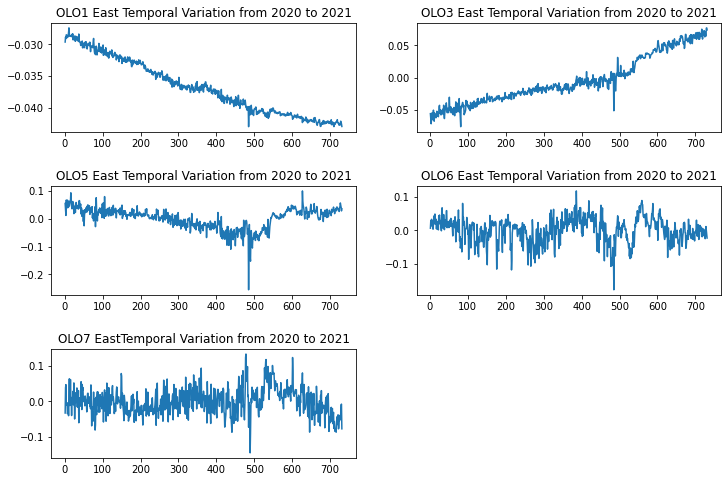

In [661]:
# Plot the temporal signature vT1 North component
fig = plt.figure(figsize=(12,8))
#axs = axs.reshape(-1)
ax1 = fig.add_subplot(321)
plt.subplots_adjust(hspace=0.5)
V = vT[0,:]
ax1.title.set_text('OLO1 East Temporal Variation from 2020 to 2021')
plt.plot(range(1,len(V)+1),V)

ax2 = fig.add_subplot(322)
V = vT[1,:]
ax2.title.set_text('OLO3 East Temporal Variation from 2020 to 2021')
plt.plot(range(1,len(V)+1),V)

ax3 = fig.add_subplot(323)
V = vT[2,:]
ax3.title.set_text('OLO5 East Temporal Variation from 2020 to 2021')
plt.plot(range(1,len(V)+1),V)

ax4 = fig.add_subplot(324)
V = vT[3,:]
ax4.title.set_text('OLO6 East Temporal Variation from 2020 to 2021')
plt.plot(range(1,len(V)+1),V)

ax5 = fig.add_subplot(325)
V = vT[4,:]
ax5.title.set_text('OLO7 EastTemporal Variation from 2020 to 2021')
plt.plot(range(1,len(V)+1),V)

plt.savefig('SVD_GPS_E_TEMPORAL.png') # save in standard resolution

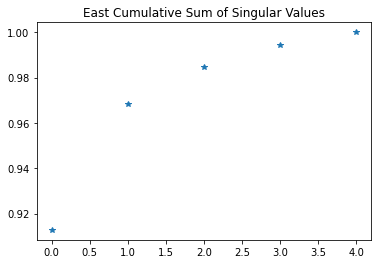

In [662]:
plt.figure()
plt.plot(np.cumsum(s)/np.sum(s),'*')
plt.title('East Cumulative Sum of Singular Values')
#plt.show()
plt.savefig('SUM_SVD_GPS_E.png') # save in standard resolution

In [663]:
# Computing Spatial u and temporal vT patterns for N_GPS 
u1,s1,vT1 = np.linalg.svd(X_N,full_matrices=0) # performs the singular value decomposition

In [476]:
print('Size of u1: ', u1.shape) 

Size of u1:  (5, 5)


In [477]:
print('Size of vT1: ', vT1.shape) 

Size of vT1:  (5, 731)


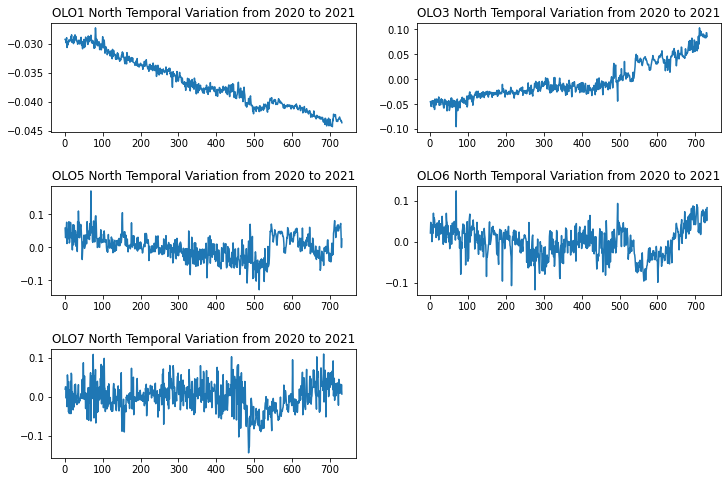

In [666]:
# Plot the temporal signature vT1 North component
fig = plt.figure(figsize=(12,8))
#axs = axs.reshape(-1)
ax1 = fig.add_subplot(321)
plt.subplots_adjust(hspace=0.5)
V = vT1[0,:]
ax1.title.set_text('OLO1 North Temporal Variation from 2020 to 2021')
plt.plot(range(1,len(V)+1),V)

ax2 = fig.add_subplot(322)
V = vT1[1,:]
ax2.title.set_text('OLO3 North Temporal Variation from 2020 to 2021')
plt.plot(range(1,len(V)+1),V)

ax3 = fig.add_subplot(323)
V = vT1[2,:]
ax3.title.set_text('OLO5 North Temporal Variation from 2020 to 2021')
plt.plot(range(1,len(V)+1),V)

ax4 = fig.add_subplot(324)
V = vT1[3,:]
ax4.title.set_text('OLO6 North Temporal Variation from 2020 to 2021')
plt.plot(range(1,len(V)+1),V)

ax5 = fig.add_subplot(325)
V = vT1[4,:]
ax5.title.set_text('OLO7 North Temporal Variation from 2020 to 2021')
plt.plot(range(1,len(V)+1),V)

plt.savefig('SVD_GPS_N_TEMPORAL.png') # save in standard resolution

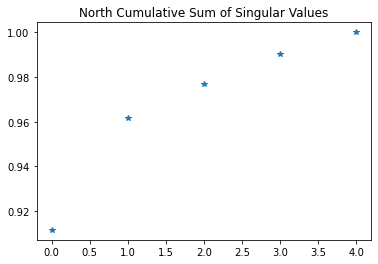

In [667]:
plt.figure()
plt.plot(np.cumsum(s1)/np.sum(s1),'*')
plt.title('North Cumulative Sum of Singular Values')
plt.savefig('SUM_SVD_GPS_N.png') # save in standard resolution
#plt.show()

In [668]:
# Computing Spatial u and temporal vT patterns for Up_GPS
u2,s2,vT2 = np.linalg.svd(X_U,full_matrices=0) # performs the singular value decomposition

In [482]:
print('Size of u2: ', u2.shape) 

Size of u2:  (5, 5)


In [483]:
print('Size of vT2: ', vT2.shape) 

Size of vT2:  (5, 731)


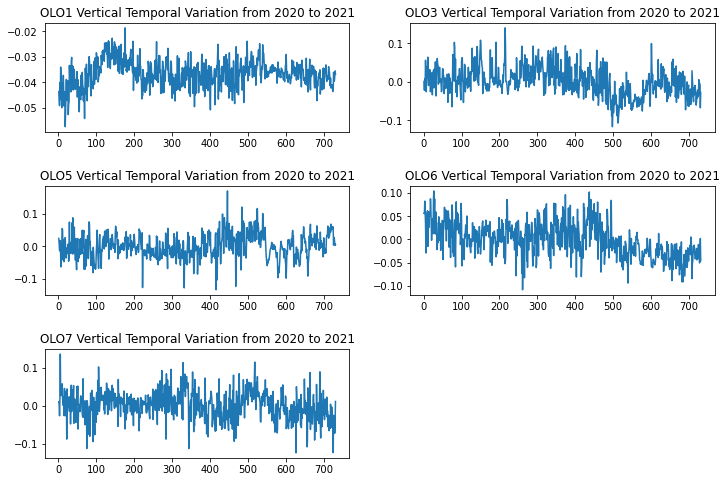

In [669]:
# Plot the temporal signature vT2 for Up/vertical component
fig = plt.figure(figsize=(12,8))
#axs = axs.reshape(-1)
ax1 = fig.add_subplot(321)
plt.subplots_adjust(hspace=0.5)
V = vT2[0,:]
ax1.title.set_text('OLO1 Vertical Temporal Variation from 2020 to 2021')
plt.plot(range(1,len(V)+1),V)

ax2 = fig.add_subplot(322)
V = vT2[1,:]
ax2.title.set_text('OLO3 Vertical Temporal Variation from 2020 to 2021')
plt.plot(range(1,len(V)+1),V)

ax3 = fig.add_subplot(323)
V = vT2[2,:]
ax3.title.set_text('OLO5 Vertical Temporal Variation from 2020 to 2021')
plt.plot(range(1,len(V)+1),V)

ax4 = fig.add_subplot(324)
V = vT2[3,:]
ax4.title.set_text('OLO6 Vertical Temporal Variation from 2020 to 2021')
plt.plot(range(1,len(V)+1),V)

ax5 = fig.add_subplot(325)
V = vT2[4,:]
ax5.title.set_text('OLO7 Vertical Temporal Variation from 2020 to 2021')
plt.plot(range(1,len(V)+1),V)

plt.savefig('SVD_GPS_U_TEMPORL') # save in standard resolution

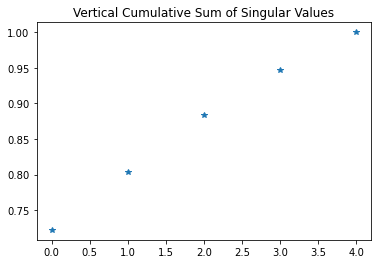

In [670]:
plt.figure()
plt.plot(np.cumsum(s2)/np.sum(s2),'*')
plt.title('Vertical Cumulative Sum of Singular Values')
plt.savefig('SUM_SVD_GPS_U.png') # save in standard resolution
#plt.show()

### Ploting the Saptial patterns for both East, North and Vertical

In [671]:
# Reads the boundary files for Ol Doinyo Lengai
boundOD = np.genfromtxt('./odl/odl1.csv', skip_header = 1, delimiter = ',')

# convert the  boundary to polygon 
PolyOD = []
for j in range(len(boundOD[:,1])):
    PolyOD.append(tuple(boundOD[j,:]))
polyOD = Polygon(PolyOD)

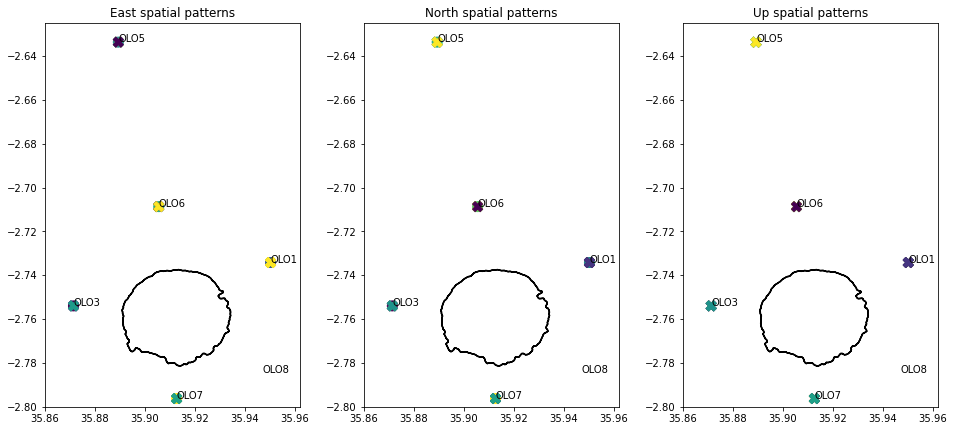

In [672]:
# Plots figure of Precipitation and Temperature for the year 2017 and 2021
fig = plt.figure(figsize=(16,24))

ax1 = fig.add_subplot(331)
plt.subplots_adjust(wspace=0.25)
ax1.plot(boundOD[:,0], boundOD[:,1], 'k-')
ax1.set_xlim(35.86,35.962)
ax1.set_ylim(-2.8,-2.625)
ax1.title.set_text('East spatial patterns')



# cordinates for the other GPS points OLo1, OLO3, OLO5,OLO6,OLO7 and OLO8
OLO1_lat = -2.73420
OLO1_lon = 35.95022

OLO3_lat = -2.75398
OLO3_lon = 35.8714

OLO5_lat = -2.63368
OLO5_lon = 35.88934

OLO6_lat = -2.70871
OLO6_lon = 35.90551

OLO7_lat = -2.79624
OLO7_lon = 35.91266

OLO8_lat = -2.78462
OLO8_lon = 35.94699

plt.plot(OLO1_lon,OLO1_lat,"r.",markersize=0.001)     # location or dot mark of OLO1
plt.plot(OLO3_lon,OLO3_lat,"r.",markersize=0.001)     # location or dot mark of OLO3
plt.plot(OLO5_lon,OLO5_lat,"r.",markersize=0.001)     # location or dot mark of OLO5
plt.plot(OLO6_lon,OLO6_lat,"r.",markersize=0.001)     # location or dot mark of OLO6
plt.plot(OLO7_lon,OLO7_lat,"r.",markersize=0.001)     # location or dot mark of OLO7
plt.plot(OLO8_lon,OLO8_lat,"r.",markersize=0.001)     # location or dot mark of OLO8
plt.text(OLO1_lon, OLO1_lat, 'OLO1', color="black")  # text for OLO1
plt.text(OLO3_lon, OLO3_lat, 'OLO3', color="black")  # text for OLO3
plt.text(OLO5_lon, OLO5_lat, 'OLO5', color="black")       # text for OLO5 
plt.text(OLO6_lon, OLO6_lat, 'OLO6', color="black")       # text for OLO6
plt.text(OLO7_lon, OLO7_lat, 'OLO7', color="black") # text for OLO7
plt.text(OLO8_lon, OLO8_lat, 'OLO8', color="black")  # text for OLO8

lat = np.array([OLO1_lat, OLO3_lat, OLO5_lat, OLO6_lat, OLO7_lat])
lon =np.array([OLO1_lon, OLO3_lon, OLO5_lon, OLO6_lon, OLO7_lon])

plt.scatter(lon,lat, s=100, c=u[:,0],marker='X',cmap='viridis',edgecolors='face')
plt.scatter(lon,lat, s=100, c=u[:,1],marker='o')
plt.scatter(lon,lat, s=100, c=u[:,2],marker='X')
plt.scatter(lon,lat, s=100, c=u[:,3],marker='X')
plt.scatter(lon,lat, s=100, c=u[:,4],marker='X')
#plt.colorbar

ax2 = fig.add_subplot(332)

ax2.plot(boundOD[:,0], boundOD[:,1], 'k-')
ax2.set_xlim(35.86,35.962)
ax2.set_ylim(-2.8,-2.625)
ax2.title.set_text('North spatial patterns')
# cordinates for the other GPS points OLo1, OLO3, OLO5,OLO6,OLO7 and OLO8
OLO1_lat = -2.73420
OLO1_lon = 35.95022

OLO3_lat = -2.75398
OLO3_lon = 35.8714

OLO5_lat = -2.63368
OLO5_lon = 35.88934

OLO6_lat = -2.70871
OLO6_lon = 35.90551

OLO7_lat = -2.79624
OLO7_lon = 35.91266

OLO8_lat = -2.78462
OLO8_lon = 35.94699

plt.plot(OLO1_lon,OLO1_lat,"r.",markersize=0.001)     # location or dot mark of OLO1
plt.plot(OLO3_lon,OLO3_lat,"r.",markersize=0.001)     # location or dot mark of OLO3
plt.plot(OLO5_lon,OLO5_lat,"r.",markersize=0.001)     # location or dot mark of OLO5
plt.plot(OLO6_lon,OLO6_lat,"r.",markersize=0.001)     # location or dot mark of OLO6
plt.plot(OLO7_lon,OLO7_lat,"r.",markersize=0.001)     # location or dot mark of OLO7
plt.plot(OLO8_lon,OLO8_lat,"r.",markersize=0.001)     # location or dot mark of OLO8
plt.text(OLO1_lon, OLO1_lat, 'OLO1', color="black")  # text for OLO1
plt.text(OLO3_lon, OLO3_lat, 'OLO3', color="black")  # text for OLO3
plt.text(OLO5_lon, OLO5_lat, 'OLO5', color="black")       # text for OLO5 
plt.text(OLO6_lon, OLO6_lat, 'OLO6', color="black")       # text for OLO6
plt.text(OLO7_lon, OLO7_lat, 'OLO7', color="black") # text for OLO7
plt.text(OLO8_lon, OLO8_lat, 'OLO8', color="black")  # text for OLO8

lat = np.array([OLO1_lat, OLO3_lat, OLO5_lat, OLO6_lat, OLO7_lat])
lon =np.array([OLO1_lon, OLO3_lon, OLO5_lon, OLO6_lon, OLO7_lon])

plt.scatter(lon,lat, s=100, c=u1[:,0],marker='X',cmap='viridis',edgecolors='face')
plt.scatter(lon,lat, s=100, c=u1[:,1],marker='o')
plt.scatter(lon,lat, s=100, c=u1[:,2],marker='X')
plt.scatter(lon,lat, s=100, c=u1[:,3],marker='X')
plt.scatter(lon,lat, s=100, c=u1[:,4],marker='X')


ax3 = fig.add_subplot(333)

ax3.plot(boundOD[:,0], boundOD[:,1], 'k-')
ax3.set_xlim(35.86,35.962)
ax3.set_ylim(-2.8,-2.625)
ax3.title.set_text('Up spatial patterns')
# cordinates for the other GPS points OLo1, OLO3, OLO5,OLO6,OLO7 and OLO8
OLO1_lat = -2.73420
OLO1_lon = 35.95022

OLO3_lat = -2.75398
OLO3_lon = 35.8714

OLO5_lat = -2.63368
OLO5_lon = 35.88934

OLO6_lat = -2.70871
OLO6_lon = 35.90551

OLO7_lat = -2.79624
OLO7_lon = 35.91266

OLO8_lat = -2.78462
OLO8_lon = 35.94699

plt.plot(OLO1_lon,OLO1_lat,"r.",markersize=0.001)     # location or dot mark of OLO1
plt.plot(OLO3_lon,OLO3_lat,"r.",markersize=0.001)     # location or dot mark of OLO3
plt.plot(OLO5_lon,OLO5_lat,"r.",markersize=0.001)     # location or dot mark of OLO5
plt.plot(OLO6_lon,OLO6_lat,"r.",markersize=0.001)     # location or dot mark of OLO6
plt.plot(OLO7_lon,OLO7_lat,"r.",markersize=0.001)     # location or dot mark of OLO7
plt.plot(OLO8_lon,OLO8_lat,"r.",markersize=0.001)     # location or dot mark of OLO8
plt.text(OLO1_lon, OLO1_lat, 'OLO1', color="black")  # text for OLO1
plt.text(OLO3_lon, OLO3_lat, 'OLO3', color="black")  # text for OLO3
plt.text(OLO5_lon, OLO5_lat, 'OLO5', color="black")       # text for OLO5 
plt.text(OLO6_lon, OLO6_lat, 'OLO6', color="black")       # text for OLO6
plt.text(OLO7_lon, OLO7_lat, 'OLO7', color="black") # text for OLO7
plt.text(OLO8_lon, OLO8_lat, 'OLO8', color="black")  # text for OLO8

lat = np.array([OLO1_lat, OLO3_lat, OLO5_lat, OLO6_lat, OLO7_lat])
lon =np.array([OLO1_lon, OLO3_lon, OLO5_lon, OLO6_lon, OLO7_lon])

#plt.scatter(lon,lat, s=100, c=u1[:,0],marker='X',cmap='viridis',edgecolors='face')
plt.scatter(lon,lat, s=100, c=u1[:,0],marker='X')
plt.scatter(lon,lat, s=100, c=u1[:,1],marker='X')
plt.scatter(lon,lat, s=100, c=u1[:,2],marker='X')
plt.scatter(lon,lat, s=100, c=u1[:,3],marker='X')
plt.scatter(lon,lat, s=100, c=u1[:,4],marker='X')
plt.show()
fig.savefig('GPS_SPATIAL.png')

### Working with Climate variables: Precipitation and Temperature

In [673]:
# Importing data file with precipitation and temperature
filename = 'data.nc'
ncdata = Dataset(filename, mode='r')

In [674]:
print(ncdata)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2022-12-02 06:58:49 GMT by grib_to_netcdf-2.24.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/tmp/1ff7cb71-d662-4288-97c0-ef884133dfea-adaptor.mars.internal-1669964328.8073528-19299-19-tmp.nc /cache/tmp/1ff7cb71-d662-4288-97c0-ef884133dfea-adaptor.mars.internal-1669964272.4683335-19299-17-tmp.grib
    dimensions(sizes): longitude(5), latitude(5), time(69)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 skt(time, latitude, longitude), int16 tp(time, latitude, longitude)
    groups: 


In [675]:
ncdata.variables

{'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     units: degrees_east
     long_name: longitude
 unlimited dimensions: 
 current shape = (5,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     units: degrees_north
     long_name: latitude
 unlimited dimensions: 
 current shape = (5,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
     units: hours since 1900-01-01 00:00:00.0
     long_name: time
     calendar: gregorian
 unlimited dimensions: 
 current shape = (69,)
 filling on, default _FillValue of -2147483647 used,
 'skt': <class 'netCDF4._netCDF4.Variable'>
 int16 skt(time, latitude, longitude)
     scale_factor: 0.0003505658647170128
     add_offset: 297.77960987331767
     _FillValue: -32767
     missing_value: -32767
     units: K
     long_name: Skin temperature
 unlimited 

In [676]:
#  read lat, lon, time and temperature into numpy arrays
lat = ncdata.variables['latitude'][:].data
lon = ncdata.variables['longitude'][:].data
time = ncdata.variables['time'][:].data
prc = ncdata.variables['tp'][:].data
fillvalue = ncdata.variables['tp']._FillValue
prc[prc==fillvalue] = np.nan   # set missing values to nan
tmp = ncdata.variables['skt'][:].data
fillvalue = ncdata.variables['skt']._FillValue
tmp1 = tmp -  273.15; # convert unit to Celcius
tmp1[tmp1==fillvalue] = np.nan   # set missing values to nan
ncdata.close()

In [677]:
# converting the 1D coordinate arrays to a meshgrid
lonGrid, latGrid = np.meshgrid(lon,lat)

In [678]:
# load the boundary coordinates of the volcano
boundOLD = np.genfromtxt('./odl/odl1.csv', skip_header = 1, delimiter = ',')

In [679]:
boundOLD

array([[35.91398, -2.78142],
       [35.915  , -2.781  ],
       [35.91537, -2.78062],
       ...,
       [35.91245, -2.78069],
       [35.91283, -2.78105],
       [35.9136 , -2.78127]])

In [680]:
# Reads the boundary files for Ol Doinyo Lengai
boundOD = np.genfromtxt('./odl/odl1.csv', skip_header = 1, delimiter = ',')

# convert the  boundary to polygon 
PolyOD = []
for j in range(len(boundOD[:,1])):
    PolyOD.append(tuple(boundOD[j,:]))
polyOD = Polygon(PolyOD)

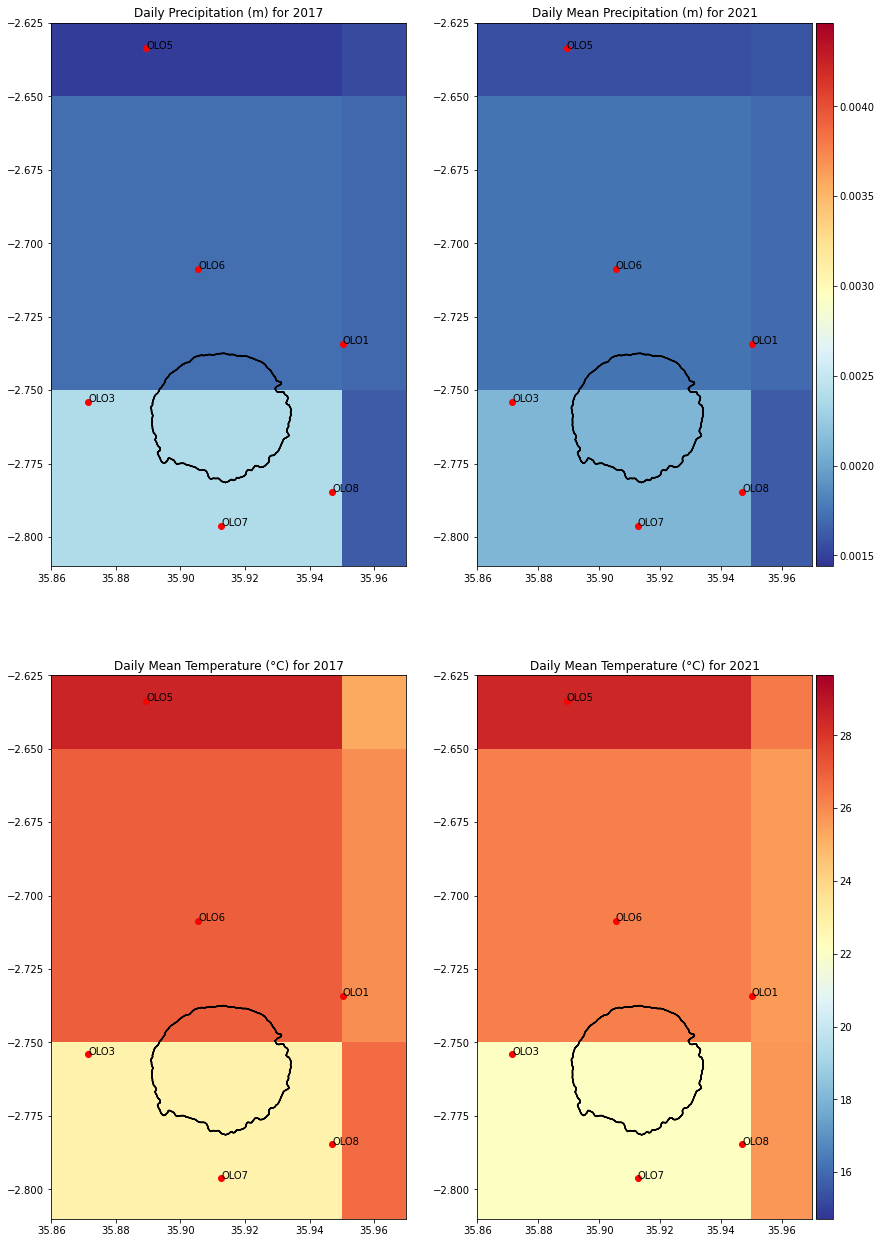

In [681]:
# Plots figure of Precipitation and Temperature for the year 2017 and 2021
fig = plt.figure(figsize=(14,22))
ax1 = fig.add_subplot(221)

ax1.pcolormesh(lonGrid,latGrid, prc[0,:,:], shading='auto',cmap='RdYlBu_r')
ax1.plot(boundOD[:,0], boundOD[:,1], 'k-')
ax1.set_xlim(35.86,35.97)
ax1.set_ylim(-2.81,-2.625)
ax1.title.set_text('Daily Precipitation (m) for 2017')
# cordinates for the other GPS points OLo1, OLO3, OLO5,OLO6,OLO7 and OLO8
OLO1_lat = -2.73420
OLO1_lon = 35.95022

OLO3_lat = -2.75398
OLO3_lon = 35.8714

OLO5_lat = -2.63368
OLO5_lon = 35.88934

OLO6_lat = -2.70871
OLO6_lon = 35.90551

OLO7_lat = -2.79624
OLO7_lon = 35.91266

OLO8_lat = -2.78462
OLO8_lon = 35.94699

plt.plot(OLO1_lon,OLO1_lat,"ro")     # location or dot mark of OLO1
plt.plot(OLO3_lon,OLO3_lat,"ro")     # location or dot mark of OLO3
plt.plot(OLO5_lon,OLO5_lat,"ro")     # location or dot mark of OLO5
plt.plot(OLO6_lon,OLO6_lat,"ro")     # location or dot mark of OLO6
plt.plot(OLO7_lon,OLO7_lat,"ro")     # location or dot mark of OLO7
plt.plot(OLO8_lon,OLO8_lat,"ro")     # location or dot mark of OLO8
plt.text(OLO1_lon, OLO1_lat, 'OLO1', color="black")  # text for OLO1
plt.text(OLO3_lon, OLO3_lat, 'OLO3', color="black")  # text for OLO3
plt.text(OLO5_lon, OLO5_lat, 'OLO5', color="black")       # text for OLO5 
plt.text(OLO6_lon, OLO6_lat, 'OLO6', color="black")       # text for OLO6
plt.text(OLO7_lon, OLO7_lat, 'OLO7', color="black") # text for OLO7
plt.text(OLO8_lon, OLO8_lat, 'OLO8', color="black")  # text for OLO8

ax2 = fig.add_subplot(222)

im1=ax2.pcolormesh(lonGrid,latGrid, prc[4,:,:],  shading='auto',cmap='RdYlBu_r')
ax2.plot(boundOD[:,0], boundOD[:,1], 'k-')
ax2.set_xlim(35.86,35.97)
ax2.set_ylim(-2.81,-2.625)
# cordinates for the other GPS points OLO1, OLO3, OLO5,OLO6,OLO7 and OLO8
OLO1_lat = -2.73420
OLO1_lon = 35.95022

OLO3_lat = -2.75398
OLO3_lon = 35.8714

OLO5_lat = -2.63368
OLO5_lon = 35.88934

OLO6_lat = -2.70871
OLO6_lon = 35.90551

OLO7_lat = -2.79624
OLO7_lon = 35.91266

OLO8_lat = -2.78462
OLO8_lon = 35.94699

plt.plot(OLO1_lon,OLO1_lat,"ro")     # location or dot mark of OLO1
plt.plot(OLO3_lon,OLO3_lat,"ro")     # location or dot mark of OLO3
plt.plot(OLO5_lon,OLO5_lat,"ro")     # location or dot mark of OLO5
plt.plot(OLO6_lon,OLO6_lat,"ro")     # location or dot mark of OLO6
plt.plot(OLO7_lon,OLO7_lat,"ro")     # location or dot mark of OLO7
plt.plot(OLO8_lon,OLO8_lat,"ro")     # location or dot mark of OLO8
plt.text(OLO1_lon, OLO1_lat, 'OLO1', color="black")  # text for OLO1
plt.text(OLO3_lon, OLO3_lat, 'OLO3', color="black")  # text for OLO3
plt.text(OLO5_lon, OLO5_lat, 'OLO5', color="black")       # text for OLO5 
plt.text(OLO6_lon, OLO6_lat, 'OLO6', color="black")       # text for OLO6
plt.text(OLO7_lon, OLO7_lat, 'OLO7', color="black") # text for OLO7
plt.text(OLO8_lon, OLO8_lat, 'OLO8', color="black")  # text for OLO8
ax2.title.set_text('Daily Mean Precipitation (m) for 2021')

divider = make_axes_locatable(ax2)
cax1 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax1, orientation='vertical')

ax3 = fig.add_subplot(223)

ax3.pcolormesh(lonGrid,latGrid, tmp1[0,:,:], shading='auto',cmap='RdYlBu_r')
ax3.plot(boundOD[:,0], boundOD[:,1], 'k-')
ax3.set_xlim(35.86,35.97)
ax3.set_ylim(-2.81,-2.625)
# cordinates for the other GPS points OLo1, OLO3, OLO5,OLO6,OLO7 and OLO8
OLO1_lat = -2.73420
OLO1_lon = 35.95022

OLO3_lat = -2.75398
OLO3_lon = 35.8714

OLO5_lat = -2.63368
OLO5_lon = 35.88934

OLO6_lat = -2.70871
OLO6_lon = 35.90551

OLO7_lat = -2.79624
OLO7_lon = 35.91266

OLO8_lat = -2.78462
OLO8_lon = 35.94699

plt.plot(OLO1_lon,OLO1_lat,"ro")     # location or dot mark of OLO1
plt.plot(OLO3_lon,OLO3_lat,"ro")     # location or dot mark of OLO3
plt.plot(OLO5_lon,OLO5_lat,"ro")     # location or dot mark of OLO5
plt.plot(OLO6_lon,OLO6_lat,"ro")     # location or dot mark of OLO6
plt.plot(OLO7_lon,OLO7_lat,"ro")     # location or dot mark of OLO7
plt.plot(OLO8_lon,OLO8_lat,"ro")     # location or dot mark of OLO8
plt.text(OLO1_lon, OLO1_lat, 'OLO1', color="black")  # text for OLO1
plt.text(OLO3_lon, OLO3_lat, 'OLO3', color="black")  # text for OLO3
plt.text(OLO5_lon, OLO5_lat, 'OLO5', color="black")       # text for OLO5 
plt.text(OLO6_lon, OLO6_lat, 'OLO6', color="black")       # text for OLO6
plt.text(OLO7_lon, OLO7_lat, 'OLO7', color="black") # text for OLO7
plt.text(OLO8_lon, OLO8_lat, 'OLO8', color="black")  # text for OLO8
ax3.title.set_text('Daily Mean Temperature (\N{DEGREE SIGN}C) for 2017')
ax4 = fig.add_subplot(224)

im2=ax4.pcolormesh(lonGrid,latGrid, tmp1[4,:,:], shading='auto',cmap='RdYlBu_r')
ax4.plot(boundOD[:,0], boundOD[:,1], 'k-')
ax4.set_xlim(35.86,35.97)
ax4.set_ylim(-2.81,-2.625)
# cordinates for the other GPS points OLo1, OLO3, OLO5,OLO6,OLO7 and OLO8
OLO1_lat = -2.73420
OLO1_lon = 35.95022

OLO3_lat = -2.75398
OLO3_lon = 35.8714

OLO5_lat = -2.63368
OLO5_lon = 35.88934

OLO6_lat = -2.70871
OLO6_lon = 35.90551

OLO7_lat = -2.79624
OLO7_lon = 35.91266

OLO8_lat = -2.78462
OLO8_lon = 35.94699

plt.plot(OLO1_lon,OLO1_lat,"ro")     # location or dot mark of OLO1
plt.plot(OLO3_lon,OLO3_lat,"ro")     # location or dot mark of OLO3
plt.plot(OLO5_lon,OLO5_lat,"ro")     # location or dot mark of OLO5
plt.plot(OLO6_lon,OLO6_lat,"ro")     # location or dot mark of OLO6
plt.plot(OLO7_lon,OLO7_lat,"ro")     # location or dot mark of OLO7
plt.plot(OLO8_lon,OLO8_lat,"ro")     # location or dot mark of OLO8
plt.text(OLO1_lon, OLO1_lat, 'OLO1', color="black")  # text for OLO1
plt.text(OLO3_lon, OLO3_lat, 'OLO3', color="black")  # text for OLO3
plt.text(OLO5_lon, OLO5_lat, 'OLO5', color="black")       # text for OLO5 
plt.text(OLO6_lon, OLO6_lat, 'OLO6', color="black")       # text for OLO6
plt.text(OLO7_lon, OLO7_lat, 'OLO7', color="black") # text for OLO7
plt.text(OLO8_lon, OLO8_lat, 'OLO8', color="black")  # text for OLO8
ax4.title.set_text('Daily Mean Temperature (\N{DEGREE SIGN}C) for 2021')
divider = make_axes_locatable(ax4)
cax = divider.append_axes('right', size='5%', pad=0.05)

fig.colorbar(im2, cax=cax, orientation='vertical')
fig.savefig('PREC_TEMP_SPATIAL.png')

### Ploting time series for Precipitation and Temperature

In [682]:
# getting the number of months in the dataset
NoOfMonths = len(time)     

# creating a numpy array of the same length, containing zeros
monthlyMeantmp1 = np.zeros(NoOfMonths) 

# iterating over each month in a for-loop: estimating mean 'tos' over the globe
for t in range(NoOfMonths):            
    
    # using nanmean to make sure nan values are ignored
    monthlyMeantmp1[t] = np.nanmean(tmp1[t]) 

In [683]:
# getting the number of months in the dataset 
NoOfMonths = len(time)  
# creating a numpy array of the same length, containing zeros
monthlyMeanprc = np.zeros(NoOfMonths) 

# iterating over each month in a for-loop: estimating mean 'tos' over the globe
for t in range(NoOfMonths):            
    
    # using nanmean to make sure nan values are ignored
    monthlyMeanprc[t] = np.nanmean(prc[t]) 

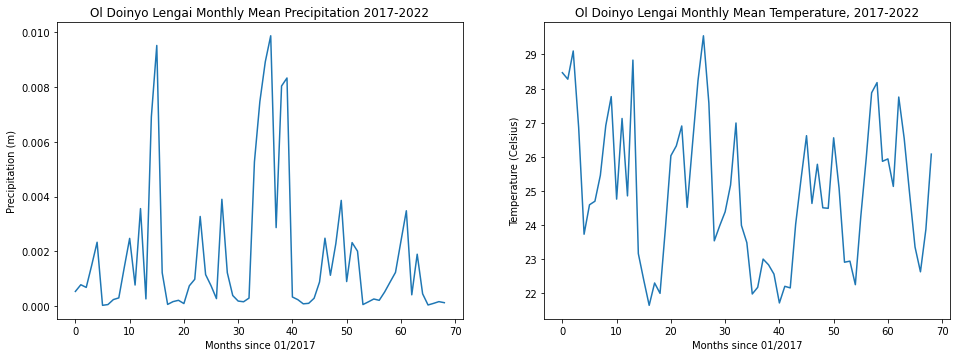

In [684]:
# plotting the time series of mean monthly precipitation of Ol Doinyo Lengai)
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(221)
ax1.plot(range(NoOfMonths),monthlyMeanprc)
ax1.title.set_text('Daily Precipitation (m) for 2017')
# adding labels
plt.title("Ol Doinyo Lengai Monthly Mean Precipitation 2017-2022")
plt.xlabel('Months since 01/2017')
plt.ylabel('Precipitation (m)')

# plotting the time series of mean monthly temperature of Ol Doinyo Lengai)
ax2 = fig.add_subplot(222)
ax2.plot(range(NoOfMonths),monthlyMeantmp1)

# adding labels
plt.title("Ol Doinyo Lengai Monthly Mean Temperature, 2017-2022")
plt.xlabel('Months since 01/2017')
plt.ylabel('Temperature (Celsius)')
plt.savefig('PREC_TEMP_TIME_SERIES.png') # save in standard resolution
plt.show() 

### Spatial and Temporal signature for Precipitation and Temperature (SVD)

In [685]:
# SVD for the temperature
# saves the length of the time, longitude, and latitude as a variable
lenTime = len(tmp1[:,0,0])
lenLat = len(lat)
lenLon = len(lon)

In [686]:
# reshapes 3D data array to 2D big data matrix X:
X_T = tmp1.reshape((lenTime,lenLon*lenLat))
X_T = np.transpose(X_T) # transpose so that spatial components on rows and temporal measurement on columns of X
print('Size of X_T: ',X_T.shape) 

Size of X_T:  (25, 69)


In [687]:
u3,s3,vT3 = np.linalg.svd(X_T,full_matrices=0) # performs the singular value decomposition

In [515]:
print('Size of u3: ', u3.shape) 

Size of u3:  (25, 25)


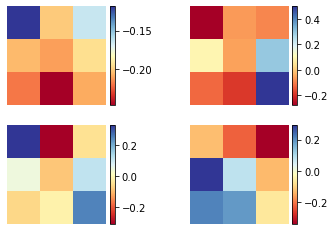

In [688]:
# plots the main features  from the svd
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)  # reshapes axes array into a 1d array (for easier indexing)
for j in range(4):
    U = np.flipud(np.reshape(u3[:,j],(lenLat,lenLon))) # reshape u-columns (1D) to maps (2D array) 
    U2 = U[::2,::2]  # slice out every second pixel to reduce image size (will plot faster)
    im = axs[j].imshow(U2,cmap='RdYlBu')
    axs[j].axis('off')
    # following lines add colorbar to each subplot
    divider = make_axes_locatable(axs[j])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical');
    plt.savefig('SVD_TEMP_SPATIAL.png') # save in standard resolution 

In [517]:
# Plot the temporal signature vT3 for Temperature variable
print('Size of vT3: ', vT3.shape) 

Size of vT3:  (25, 69)


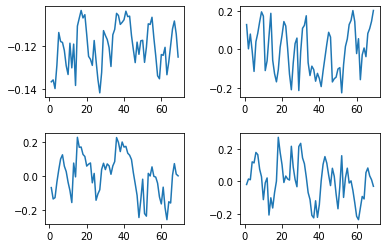

In [689]:
fig,axs = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)
axs = axs.reshape(-1)
for j in range(4):
    V = vT3[j,:]
    im = axs[j].plot(range(1,len(V)+1),V)
    plt.savefig('SVD_TEMP_TEMPORAL_ODL.png') # save in standard resolution

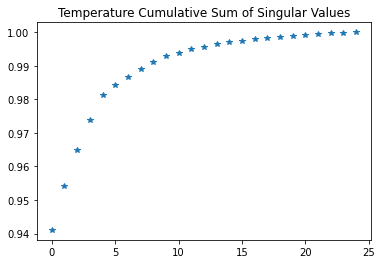

In [690]:
plt.figure()
plt.plot(np.cumsum(s3)/np.sum(s3),'*')
plt.title('Temperature Cumulative Sum of Singular Values')
plt.savefig('SUM_SVD_TEMP_TEMPORAL.png') # save in standard resolution
plt.show()

In [691]:
# SVD for the precipitation
# saves the length of the time, longitude, and latitude as a variable
lenTime = len(prc[:,0,0])
lenLat = len(lat)
lenLon = len(lon)

In [534]:
# reshapes 3D data array to 2D big data matrix X:
X_P = prc.reshape((lenTime,lenLon*lenLat))
X_P = np.transpose(X_P) # transpose so that spatial components on rows and temporal measurement on columns of X
print('Size of X_P: ',X_P.shape) 

Size of X_P:  (25, 69)


In [537]:
u4,s4,vT4 = np.linalg.svd(X_P,full_matrices=0) # performs the singular value decomposition

In [538]:
print('Size of vT4: ',vT4.shape) 

Size of vT4:  (25, 69)


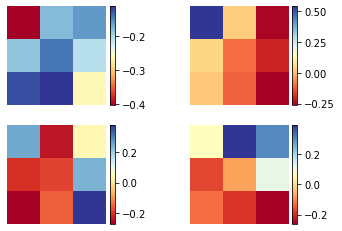

In [692]:
# plots the main features  from the svd
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)  # reshapes axes array into a 1d array (for easier indexing)
for j in range(4):
    U = np.flipud(np.reshape(u4[:,j],(lenLat,lenLon))) # reshape u-columns (1D) to maps (2D array) 
    U2 = U[::2,::2]  # slice out every second pixel to reduce image size (will plot faster)
    im = axs[j].imshow(U2,cmap='RdYlBu')
    axs[j].axis('off')
    # following lines add colorbar to each subplot
    divider = make_axes_locatable(axs[j])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical');
    plt.savefig('SVD_PREC_SPATIAL.png') # save in standard resolution

In [547]:
# plots the temporal features  from the svd

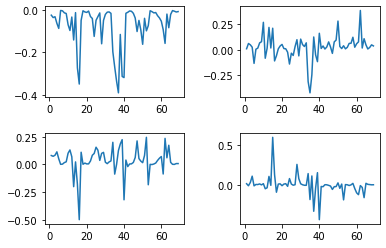

In [693]:
fig,axs = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)
axs = axs.reshape(-1)
for j in range(4):
    V = vT4[j,:]
    im = axs[j].plot(range(1,len(V)+1),V)
    plt.savefig('SVD_PREC_TEMPORAL.png') # save in standard resolution

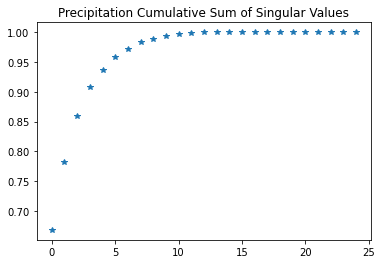

In [694]:
plt.figure()
plt.plot(np.cumsum(s4)/np.sum(s4),'*')
plt.title('Precipitation Cumulative Sum of Singular Values')
plt.savefig('SUM_SVD_PREC_TEMPORAL.png') # save in standard resolution
plt.show()

### Computing Coefficient of Co

In [580]:
import scipy.stats

In [614]:
# Extrac the temporal for GPS East component
VE1 = (vT[0,:])
VE2 = (vT[1,:])
VE3 = (vT[2,:])
VE4 = (vT[3,:])
VE5 = (vT[4,:])

In [616]:
# Extrac the temporal for GPS North component
VN1 = (vT1[0,:])
VN2 = (vT1[1,:])
VN3 = (vT1[2,:])
VN4 = (vT1[3,:])
VN5 = (vT1[4,:])

In [617]:
# Extrac thetemporal for GPS Up component
VU1 = (vT2[0,:])
VU2 = (vT2[1,:])
VU3 = (vT2[2,:])
VU4 = (vT2[3,:])
VU5 = (vT2[4,:])

In [618]:
# Extrac the temporal for Temeprature component
VT1 = (vT3[0,:])
VT2 = (vT3[1,:])
VT3 = (vT3[2,:])
VT4 = (vT3[3,:])
VT5 = (vT3[4,:])

In [619]:
# Extrac the temporal for Precipitation component
VP1 = (vT4[0,:])
VP2 = (vT4[1,:])
VP3 = (vT4[2,:])
VP4 = (vT4[3,:])
VP5 = (vT4[4,:])

In [695]:
CC,pval_pcc = scipy.stats.pearsonr(VT1, VP1)
CC,pval_pcc

(-0.3461548127277888, 0.0035740325302868877)

In [696]:
SCC,pval_scc = scipy.stats.spearmanr(VT1, VP1)
SCC, pval_scc

(-0.04336865180854951, 0.7234645461370331)

In [697]:
SCC,pval_scc = scipy.stats.spearmanr(VT2, VP2)
SCC, pval_scc

(0.35659481183777864, 0.0026338312247199194)

In [698]:
CC,pval_pcc = scipy.stats.pearsonr(VT2, VP2)
CC,pval_pcc

(0.2604235911592483, 0.030682829142914026)

In [699]:
CC,pval_pcc = scipy.stats.pearsonr(VT3, VP3)
CC,pval_pcc

(-0.3993543718116359, 0.0006755860049299152)

In [700]:
SCC,pval_scc = scipy.stats.spearmanr(VT3, VP3)
SCC, pval_scc

(-0.4493971501644136, 0.00010725337314244974)

In [701]:
CC,pval_pcc = scipy.stats.pearsonr(VT4, VP4)
CC,pval_pcc

(0.08872244934868026, 0.46848170566125047)

In [702]:
SCC,pval_scc = scipy.stats.spearmanr(VT4, VP4)
SCC, pval_scc

(0.19338691998538549, 0.11135884326791348)

In [703]:
CC,pval_pcc = scipy.stats.pearsonr(VT5, VP5)
CC,pval_pcc

(-0.018175006899017368, 0.8821635864763226)

In [704]:
SCC,pval_scc = scipy.stats.spearmanr(VT5, VP5)
SCC, pval_scc

(0.04161490683229814, 0.7342245551195226)